In [107]:
import tensorflow as tf 
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import layers

if tf.config.list_physical_devices('GPU'):
    print("gpu detectada")
else:
    print('no hay gpu')

gpu detectada


In [108]:
(X_train, y_train),(_, _) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')

X_train = (X_train - 127.5) / 127.5

X_train.shape

(60000, 28, 28, 1)

In [109]:
buffer_size = 60000
batch_size = 256

dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [110]:
def build_discriminator():
    # inputs = tf.keras.layers.Input(shape = (28, 28, 1))
    # x = tf.keras.layers.Conv2D(64, kernel_size = 5, strides = 2, padding = 'same', activation = tf.keras.layers.LeakyReLU())(inputs)
    # x = tf.keras.layers.Dropout(0.3)(x)
    # x = tf.keras.layers.Conv2D(128, kernel_size = 5, strides = 2, padding = 'same', activation = tf.keras.layers.LeakyReLU())(x)
    # x = tf.keras.layers.Dropout(0.3)(x)

    # x = tf.keras.layers.Flatten()(x)
    # outputs = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Sequential()
    
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

    

In [111]:
def build_generator(coding_size = 100):
    # inputs = tf.keras.layers.Input(shape = [coding_size])
    # x = tf.keras.layers.Dense(7*7*128)(inputs)
    # x = tf.keras.layers.BatchNormalization()(x)
    # x = tf.keras.layers.LeakyReLU()(x)
    # x  = tf.keras.layers.Reshape([7, 7, 128])(x)
    # print(x.shape)
    # x = tf.keras.layers.Conv2DTranspose(64, kernel_size = 5, strides = 2, padding = 'same', activation = tf.keras.layers.LeakyReLU())(x)
    # x = tf.keras.layers.BatchNormalization()(x)
    # print(x.shape)

    # outputs = tf.keras.layers.Conv2DTranspose(1, kernel_size = 5, strides = 2, padding = 'same', activation = 'tanh')(x)

    # generator = tf.keras.models.Model(inputs, outputs)

    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)

    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

    

In [ ]:
discriminator = build_discriminator()
generator = build_generator()



In [113]:
def plot_losses(history):
    plt.figure()
    epochs = range(1, len(history['d_loss']) + 1)
    plt.plot(epochs, history['d_loss'][-1], label = 'discriminator loss')
    plt.plot(epochs, history['g_loss'][-1], label = 'generator loss')

In [114]:
d_optimizer = tf.keras.optimizers.RMSprop(learning_rate=4e-4)
g_optimizer = tf.keras.optimizers.RMSprop(learning_rate=4e-4)


Epoch 1/5, Batch 0, Discriminator Loss: 0.5139163136482239, Generator Loss: 1.0288374423980713
Epoch 1/5, Batch 1, Discriminator Loss: 0.013089793734252453, Generator Loss: 14.538565635681152
Epoch 1/5, Batch 2, Discriminator Loss: 0.49355703592300415, Generator Loss: 0.9790197610855103
Epoch 1/5, Batch 3, Discriminator Loss: 0.6962444186210632, Generator Loss: 0.6495382785797119
Epoch 1/5, Batch 4, Discriminator Loss: 0.7081351280212402, Generator Loss: 0.732066810131073


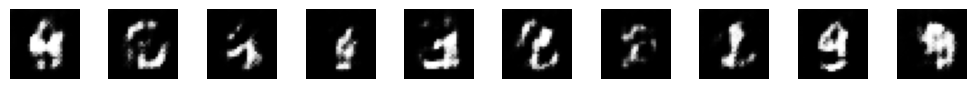

Epoch 1/5, Batch 5, Discriminator Loss: 0.692481517791748, Generator Loss: 0.7036346793174744
Epoch 1/5, Batch 6, Discriminator Loss: 0.7007782459259033, Generator Loss: 0.7692827582359314
Epoch 1/5, Batch 7, Discriminator Loss: 0.6875747442245483, Generator Loss: 0.7568089365959167
Epoch 1/5, Batch 8, Discriminator Loss: 0.7000800371170044, Generator Loss: 0.7999864816665649
Epoch 1/5, Batch 9, Discriminator Loss: 0.6844702959060669, Generator Loss: 0.7778494358062744


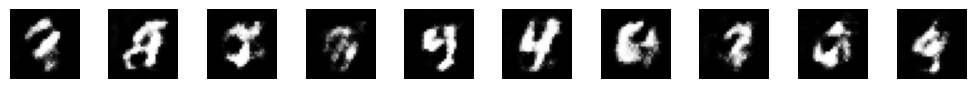

Epoch 1/5, Batch 10, Discriminator Loss: 0.6729444861412048, Generator Loss: 0.7932978868484497
Epoch 1/5, Batch 11, Discriminator Loss: 0.6730172634124756, Generator Loss: 0.7852590680122375
Epoch 1/5, Batch 12, Discriminator Loss: 0.6584856510162354, Generator Loss: 0.7943243980407715
Epoch 1/5, Batch 13, Discriminator Loss: 0.6530705094337463, Generator Loss: 0.7934220433235168
Epoch 1/5, Batch 14, Discriminator Loss: 0.6414347290992737, Generator Loss: 0.7881115078926086


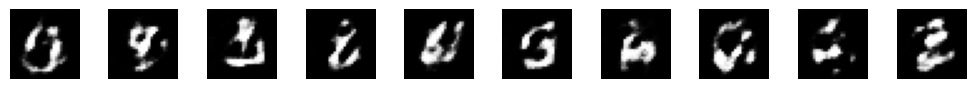

Epoch 1/5, Batch 15, Discriminator Loss: 0.6467364430427551, Generator Loss: 0.767726719379425
Epoch 1/5, Batch 16, Discriminator Loss: 0.6362004280090332, Generator Loss: 0.7905899286270142
Epoch 1/5, Batch 17, Discriminator Loss: 0.6469192504882812, Generator Loss: 0.7987985014915466
Epoch 1/5, Batch 18, Discriminator Loss: 0.6286817789077759, Generator Loss: 0.7679094672203064
Epoch 1/5, Batch 19, Discriminator Loss: 0.5938250422477722, Generator Loss: 1.0243027210235596


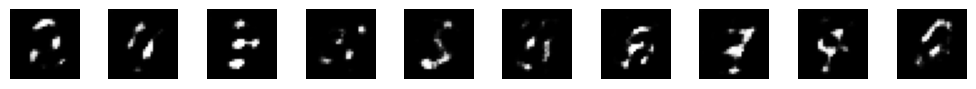

Epoch 1/5, Batch 20, Discriminator Loss: 0.5721614360809326, Generator Loss: 0.8598594665527344
Epoch 1/5, Batch 21, Discriminator Loss: 0.6288323402404785, Generator Loss: 0.7872069478034973
Epoch 1/5, Batch 22, Discriminator Loss: 0.6436135768890381, Generator Loss: 0.865994930267334
Epoch 1/5, Batch 23, Discriminator Loss: 0.6363865733146667, Generator Loss: 0.7882248163223267
Epoch 1/5, Batch 24, Discriminator Loss: 0.6319978833198547, Generator Loss: 0.7807785272598267


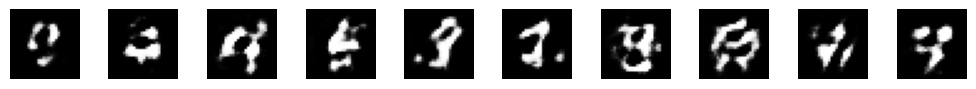

Epoch 1/5, Batch 25, Discriminator Loss: 0.6297418475151062, Generator Loss: 0.8096985816955566
Epoch 1/5, Batch 26, Discriminator Loss: 0.6284726858139038, Generator Loss: 0.8174182176589966
Epoch 1/5, Batch 27, Discriminator Loss: 0.582555890083313, Generator Loss: 0.8745043873786926
Epoch 1/5, Batch 28, Discriminator Loss: 0.5891261100769043, Generator Loss: 1.1875417232513428
Epoch 1/5, Batch 29, Discriminator Loss: 0.6153765320777893, Generator Loss: 0.815459132194519


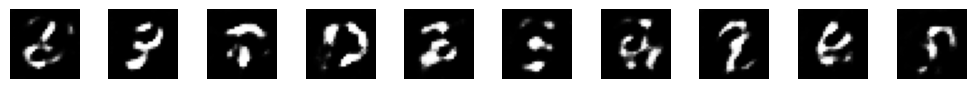

Epoch 1/5, Batch 30, Discriminator Loss: 0.6048513650894165, Generator Loss: 0.8185490369796753
Epoch 1/5, Batch 31, Discriminator Loss: 0.6291399002075195, Generator Loss: 0.8985512256622314
Epoch 1/5, Batch 32, Discriminator Loss: 0.6048884987831116, Generator Loss: 0.8243540525436401
Epoch 1/5, Batch 33, Discriminator Loss: 0.6243728399276733, Generator Loss: 1.1221356391906738
Epoch 1/5, Batch 34, Discriminator Loss: 0.6521736979484558, Generator Loss: 0.5658431649208069


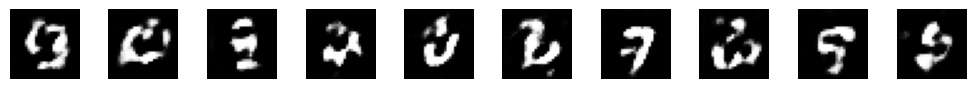

Epoch 1/5, Batch 35, Discriminator Loss: 0.6369963884353638, Generator Loss: 1.0482068061828613
Epoch 1/5, Batch 36, Discriminator Loss: 0.6113889217376709, Generator Loss: 0.7356678247451782
Epoch 1/5, Batch 37, Discriminator Loss: 0.6028921008110046, Generator Loss: 1.0304518938064575
Epoch 1/5, Batch 38, Discriminator Loss: 0.6123205423355103, Generator Loss: 0.5468690395355225
Epoch 1/5, Batch 39, Discriminator Loss: 0.6474093198776245, Generator Loss: 1.0007634162902832


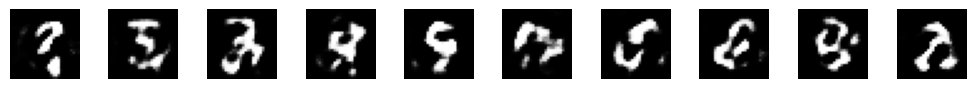

Epoch 1/5, Batch 40, Discriminator Loss: 0.5934268832206726, Generator Loss: 0.8275092840194702
Epoch 1/5, Batch 41, Discriminator Loss: 0.5817806720733643, Generator Loss: 0.845305323600769
Epoch 1/5, Batch 42, Discriminator Loss: 0.5964839458465576, Generator Loss: 0.9646097421646118
Epoch 1/5, Batch 43, Discriminator Loss: 0.5462296009063721, Generator Loss: 0.8563641905784607
Epoch 1/5, Batch 44, Discriminator Loss: 0.6503459215164185, Generator Loss: 0.7898672819137573


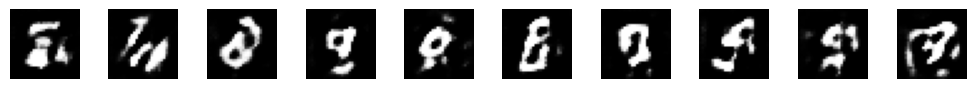

Epoch 1/5, Batch 45, Discriminator Loss: 0.6108469367027283, Generator Loss: 0.8255563974380493
Epoch 1/5, Batch 46, Discriminator Loss: 0.6249258518218994, Generator Loss: 0.8055980205535889
Epoch 1/5, Batch 47, Discriminator Loss: 0.6108689904212952, Generator Loss: 0.7948861718177795
Epoch 1/5, Batch 48, Discriminator Loss: 0.6068464517593384, Generator Loss: 0.8264788389205933
Epoch 1/5, Batch 49, Discriminator Loss: 0.6079813241958618, Generator Loss: 0.8328949809074402


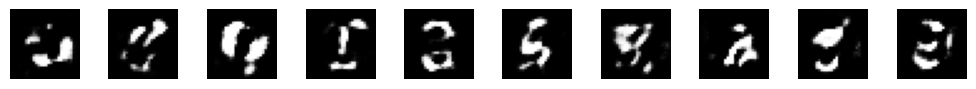

Epoch 1/5, Batch 50, Discriminator Loss: 0.5997911691665649, Generator Loss: 0.8258335590362549
Epoch 1/5, Batch 51, Discriminator Loss: 0.5793582201004028, Generator Loss: 0.9330853819847107
Epoch 1/5, Batch 52, Discriminator Loss: 0.5825269222259521, Generator Loss: 1.093973159790039
Epoch 1/5, Batch 53, Discriminator Loss: 0.5608964562416077, Generator Loss: 1.0696942806243896
Epoch 1/5, Batch 54, Discriminator Loss: 0.5854055881500244, Generator Loss: 0.8898387551307678


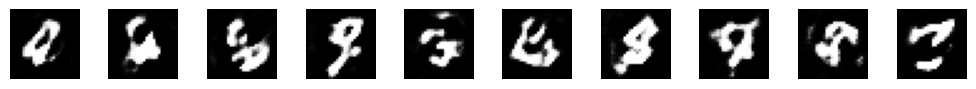

Epoch 1/5, Batch 55, Discriminator Loss: 0.5834507346153259, Generator Loss: 2.454141616821289
Epoch 1/5, Batch 56, Discriminator Loss: 0.6040292978286743, Generator Loss: 0.9051640629768372
Epoch 1/5, Batch 57, Discriminator Loss: 0.4951091706752777, Generator Loss: 1.0251834392547607
Epoch 1/5, Batch 58, Discriminator Loss: 0.5229561924934387, Generator Loss: 1.0702710151672363
Epoch 1/5, Batch 59, Discriminator Loss: 0.5632354021072388, Generator Loss: 1.0235979557037354


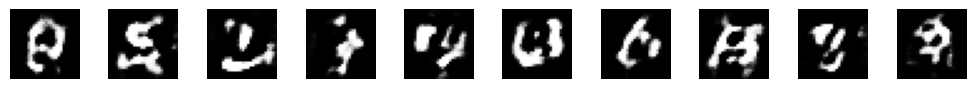

Epoch 1/5, Batch 60, Discriminator Loss: 0.5499449372291565, Generator Loss: 0.915198802947998
Epoch 1/5, Batch 61, Discriminator Loss: 0.5085188150405884, Generator Loss: 1.1072120666503906
Epoch 1/5, Batch 62, Discriminator Loss: 0.5747376680374146, Generator Loss: 0.34501397609710693
Epoch 1/5, Batch 63, Discriminator Loss: 0.7357707023620605, Generator Loss: 0.759073793888092
Epoch 1/5, Batch 64, Discriminator Loss: 0.5604736804962158, Generator Loss: 0.8377882838249207


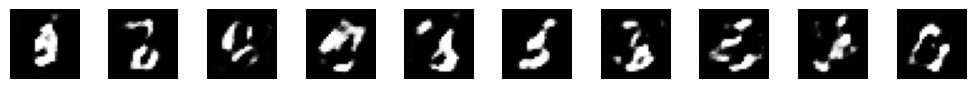

Epoch 1/5, Batch 65, Discriminator Loss: 0.563400387763977, Generator Loss: 0.8860908150672913
Epoch 1/5, Batch 66, Discriminator Loss: 0.5598357915878296, Generator Loss: 0.8836132884025574
Epoch 1/5, Batch 67, Discriminator Loss: 0.557409405708313, Generator Loss: 0.8964536190032959
Epoch 1/5, Batch 68, Discriminator Loss: 0.5463182926177979, Generator Loss: 0.8766825795173645
Epoch 1/5, Batch 69, Discriminator Loss: 0.5489662885665894, Generator Loss: 0.8962458372116089


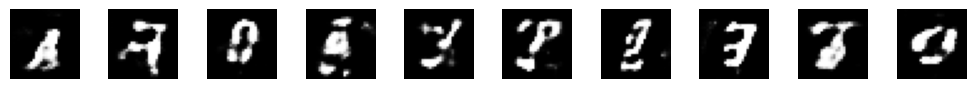

Epoch 1/5, Batch 70, Discriminator Loss: 0.5463843941688538, Generator Loss: 0.930568277835846
Epoch 1/5, Batch 71, Discriminator Loss: 0.5323702692985535, Generator Loss: 0.913521945476532
Epoch 1/5, Batch 72, Discriminator Loss: 0.5170207619667053, Generator Loss: 1.026878833770752
Epoch 1/5, Batch 73, Discriminator Loss: 0.5110019445419312, Generator Loss: 0.6453090906143188
Epoch 1/5, Batch 74, Discriminator Loss: 2.1810762882232666, Generator Loss: 7.119533061981201


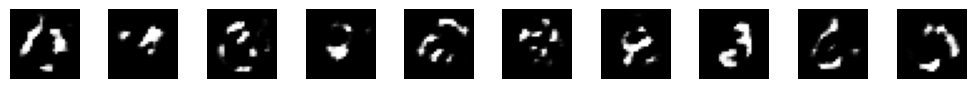

Epoch 1/5, Batch 75, Discriminator Loss: 0.5513423085212708, Generator Loss: 1.192234992980957
Epoch 1/5, Batch 76, Discriminator Loss: 0.536761462688446, Generator Loss: 1.0321714878082275
Epoch 1/5, Batch 77, Discriminator Loss: 0.5546699166297913, Generator Loss: 0.9382231831550598
Epoch 1/5, Batch 78, Discriminator Loss: 0.5718799829483032, Generator Loss: 0.9391489028930664
Epoch 1/5, Batch 79, Discriminator Loss: 0.5427089929580688, Generator Loss: 1.018951416015625


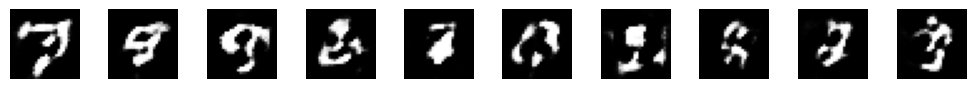

Epoch 1/5, Batch 80, Discriminator Loss: 0.5249427556991577, Generator Loss: 1.002814769744873
Epoch 1/5, Batch 81, Discriminator Loss: 0.5203804969787598, Generator Loss: 0.9996347427368164
Epoch 1/5, Batch 82, Discriminator Loss: 0.511379063129425, Generator Loss: 0.9971536993980408
Epoch 1/5, Batch 83, Discriminator Loss: 0.5158984661102295, Generator Loss: 0.9664997458457947
Epoch 1/5, Batch 84, Discriminator Loss: 0.522355318069458, Generator Loss: 0.9837214350700378


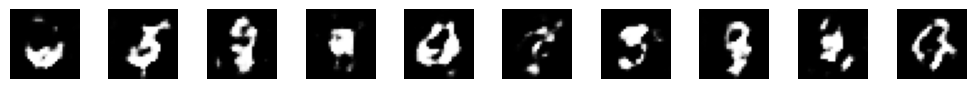

Epoch 1/5, Batch 85, Discriminator Loss: 0.4867965877056122, Generator Loss: 1.0208556652069092
Epoch 1/5, Batch 86, Discriminator Loss: 0.4904802739620209, Generator Loss: 1.0477620363235474
Epoch 1/5, Batch 87, Discriminator Loss: 0.47463321685791016, Generator Loss: 1.2584196329116821
Epoch 1/5, Batch 88, Discriminator Loss: 0.4393174648284912, Generator Loss: 3.1605212688446045
Epoch 1/5, Batch 89, Discriminator Loss: 0.39542508125305176, Generator Loss: 10.700058937072754


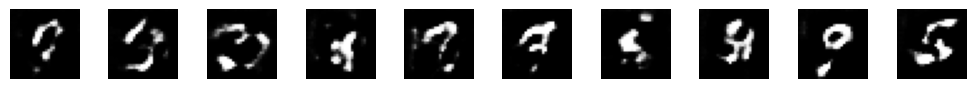

Epoch 1/5, Batch 90, Discriminator Loss: 1.2269036769866943, Generator Loss: 0.24616385996341705
Epoch 1/5, Batch 91, Discriminator Loss: 0.473538875579834, Generator Loss: 1.5324040651321411
Epoch 1/5, Batch 92, Discriminator Loss: 0.46224284172058105, Generator Loss: 1.1401751041412354
Epoch 1/5, Batch 93, Discriminator Loss: 0.5020664930343628, Generator Loss: 1.042995572090149
Epoch 1/5, Batch 94, Discriminator Loss: 0.5043390989303589, Generator Loss: 1.0171207189559937


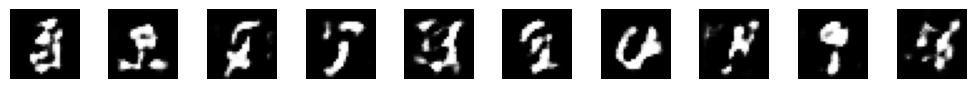

Epoch 1/5, Batch 95, Discriminator Loss: 0.5170652270317078, Generator Loss: 1.0683436393737793
Epoch 1/5, Batch 96, Discriminator Loss: 0.5133473873138428, Generator Loss: 1.0574498176574707
Epoch 1/5, Batch 97, Discriminator Loss: 0.4897148609161377, Generator Loss: 1.2170686721801758
Epoch 1/5, Batch 98, Discriminator Loss: 0.49739259481430054, Generator Loss: 1.0565874576568604
Epoch 1/5, Batch 99, Discriminator Loss: 0.4818260073661804, Generator Loss: 1.0856361389160156


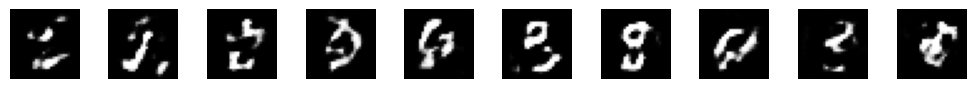

Epoch 1/5, Batch 100, Discriminator Loss: 0.4727945029735565, Generator Loss: 1.0347553491592407
Epoch 1/5, Batch 101, Discriminator Loss: 0.4775863587856293, Generator Loss: 1.1531764268875122
Epoch 1/5, Batch 102, Discriminator Loss: 0.46897998452186584, Generator Loss: 1.0968385934829712
Epoch 1/5, Batch 103, Discriminator Loss: 0.45909541845321655, Generator Loss: 1.2096855640411377
Epoch 1/5, Batch 104, Discriminator Loss: 0.4660659730434418, Generator Loss: 0.6162301301956177


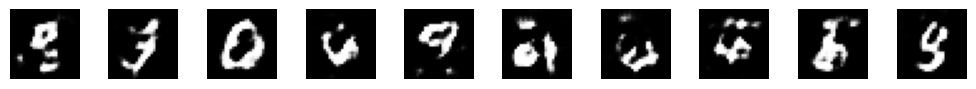

Epoch 1/5, Batch 105, Discriminator Loss: 3.3546500205993652, Generator Loss: 10.391576766967773
Epoch 1/5, Batch 106, Discriminator Loss: 0.4830787777900696, Generator Loss: 1.0478124618530273
Epoch 1/5, Batch 107, Discriminator Loss: 0.48190662264823914, Generator Loss: 1.281166434288025
Epoch 1/5, Batch 108, Discriminator Loss: 0.43810224533081055, Generator Loss: 1.2778874635696411
Epoch 1/5, Batch 109, Discriminator Loss: 0.43415573239326477, Generator Loss: 1.1443397998809814


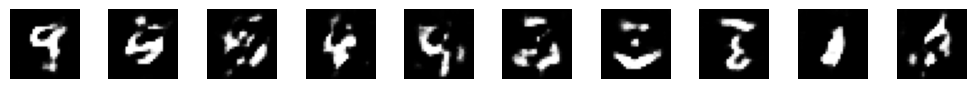

Epoch 1/5, Batch 110, Discriminator Loss: 0.4366590976715088, Generator Loss: 1.1459097862243652
Epoch 1/5, Batch 111, Discriminator Loss: 0.46869462728500366, Generator Loss: 1.0546952486038208
Epoch 1/5, Batch 112, Discriminator Loss: 0.4623216986656189, Generator Loss: 1.2213127613067627
Epoch 1/5, Batch 113, Discriminator Loss: 0.4478798508644104, Generator Loss: 1.148460865020752
Epoch 1/5, Batch 114, Discriminator Loss: 0.43785953521728516, Generator Loss: 1.370377540588379


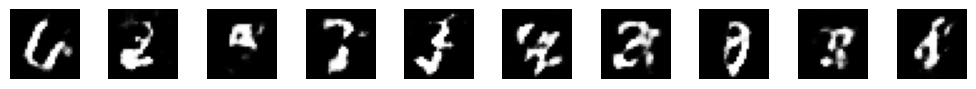

Epoch 1/5, Batch 115, Discriminator Loss: 0.4453829228878021, Generator Loss: 0.7397924661636353
Epoch 1/5, Batch 116, Discriminator Loss: 4.883596420288086, Generator Loss: 5.435444355010986
Epoch 1/5, Batch 117, Discriminator Loss: 0.5485942363739014, Generator Loss: 1.9827723503112793
Epoch 1/5, Batch 118, Discriminator Loss: 0.5201305747032166, Generator Loss: 1.526235580444336
Epoch 1/5, Batch 119, Discriminator Loss: 0.4774317741394043, Generator Loss: 1.28334379196167


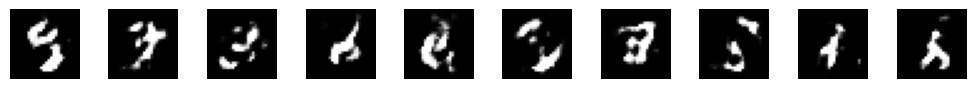

Epoch 1/5, Batch 120, Discriminator Loss: 0.4969000518321991, Generator Loss: 1.2297272682189941
Epoch 1/5, Batch 121, Discriminator Loss: 0.49017637968063354, Generator Loss: 1.1082850694656372
Epoch 1/5, Batch 122, Discriminator Loss: 0.47034621238708496, Generator Loss: 1.1444028615951538
Epoch 1/5, Batch 123, Discriminator Loss: 0.4892917275428772, Generator Loss: 1.1500270366668701
Epoch 1/5, Batch 124, Discriminator Loss: 0.44160518050193787, Generator Loss: 1.207342267036438


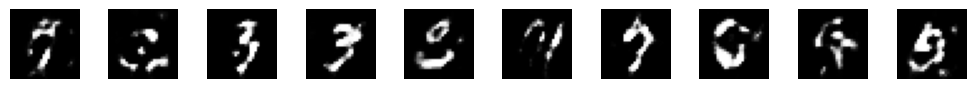

Epoch 1/5, Batch 125, Discriminator Loss: 0.42409375309944153, Generator Loss: 1.1999491453170776
Epoch 1/5, Batch 126, Discriminator Loss: 0.4371722638607025, Generator Loss: 1.4282563924789429
Epoch 1/5, Batch 127, Discriminator Loss: 0.43901190161705017, Generator Loss: 1.051013708114624
Epoch 1/5, Batch 128, Discriminator Loss: 0.4299960136413574, Generator Loss: 1.562047004699707
Epoch 1/5, Batch 129, Discriminator Loss: 0.4221097528934479, Generator Loss: 0.8641787171363831


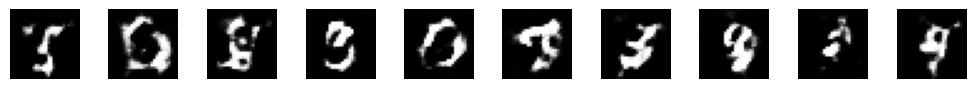

Epoch 1/5, Batch 130, Discriminator Loss: 5.425348281860352, Generator Loss: 3.741698741912842
Epoch 1/5, Batch 131, Discriminator Loss: 0.4466814398765564, Generator Loss: 2.474667549133301
Epoch 1/5, Batch 132, Discriminator Loss: 0.4395623207092285, Generator Loss: 1.4723697900772095
Epoch 1/5, Batch 133, Discriminator Loss: 0.42264342308044434, Generator Loss: 1.5943528413772583
Epoch 1/5, Batch 134, Discriminator Loss: 0.45126664638519287, Generator Loss: 1.3830493688583374


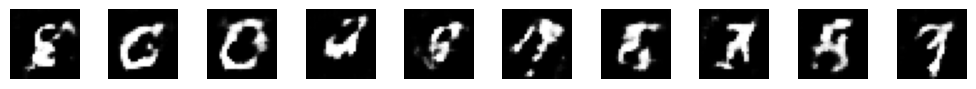

Epoch 1/5, Batch 135, Discriminator Loss: 0.41728413105010986, Generator Loss: 1.4933242797851562
Epoch 1/5, Batch 136, Discriminator Loss: 0.41407814621925354, Generator Loss: 1.293206810951233
Epoch 1/5, Batch 137, Discriminator Loss: 0.42629367113113403, Generator Loss: 1.2017993927001953
Epoch 1/5, Batch 138, Discriminator Loss: 0.37225693464279175, Generator Loss: 6.6759867668151855
Epoch 1/5, Batch 139, Discriminator Loss: 0.4184841811656952, Generator Loss: 0.36515772342681885


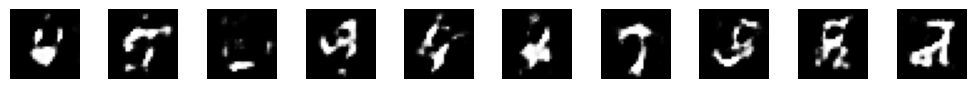

Epoch 1/5, Batch 140, Discriminator Loss: 1.0177382230758667, Generator Loss: 1.4951831102371216
Epoch 1/5, Batch 141, Discriminator Loss: 0.42063748836517334, Generator Loss: 1.47719407081604
Epoch 1/5, Batch 142, Discriminator Loss: 0.4293122887611389, Generator Loss: 1.6175457239151
Epoch 1/5, Batch 143, Discriminator Loss: 0.442230224609375, Generator Loss: 1.207130789756775
Epoch 1/5, Batch 144, Discriminator Loss: 0.4767322242259979, Generator Loss: 1.2185068130493164


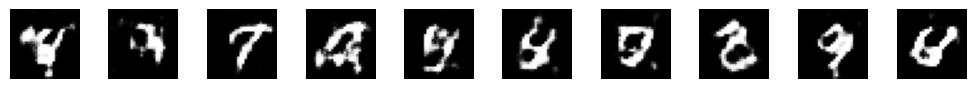

Epoch 1/5, Batch 145, Discriminator Loss: 0.4512437880039215, Generator Loss: 1.434916377067566
Epoch 1/5, Batch 146, Discriminator Loss: 0.4242006242275238, Generator Loss: 1.4688864946365356
Epoch 1/5, Batch 147, Discriminator Loss: 0.3385021984577179, Generator Loss: 1.993070125579834
Epoch 1/5, Batch 148, Discriminator Loss: 0.33849695324897766, Generator Loss: 2.79826283454895
Epoch 1/5, Batch 149, Discriminator Loss: 0.3800479471683502, Generator Loss: 1.920851230621338


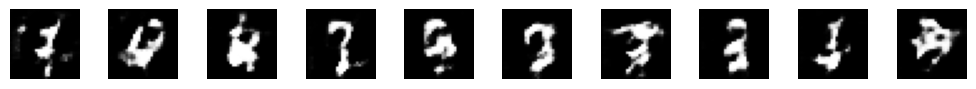

Epoch 1/5, Batch 150, Discriminator Loss: 0.37655410170555115, Generator Loss: 1.8138076066970825
Epoch 1/5, Batch 151, Discriminator Loss: 0.3724002540111542, Generator Loss: 1.9868061542510986
Epoch 1/5, Batch 152, Discriminator Loss: 0.3766072690486908, Generator Loss: 2.5627965927124023
Epoch 1/5, Batch 153, Discriminator Loss: 0.4309484362602234, Generator Loss: 0.5127390623092651
Epoch 1/5, Batch 154, Discriminator Loss: 1.8818947076797485, Generator Loss: 11.371273040771484


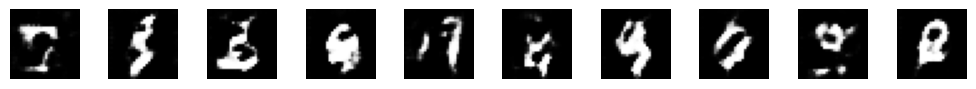

Epoch 1/5, Batch 155, Discriminator Loss: 0.42532211542129517, Generator Loss: 3.37150239944458
Epoch 1/5, Batch 156, Discriminator Loss: 0.4702194035053253, Generator Loss: 2.1760683059692383
Epoch 1/5, Batch 157, Discriminator Loss: 0.4555385112762451, Generator Loss: 1.7047779560089111
Epoch 1/5, Batch 158, Discriminator Loss: 0.4085782766342163, Generator Loss: 2.211205005645752
Epoch 1/5, Batch 159, Discriminator Loss: 0.4341156482696533, Generator Loss: 1.5405749082565308


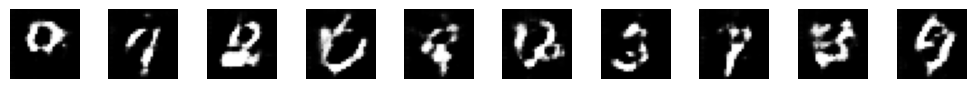

Epoch 1/5, Batch 160, Discriminator Loss: 0.4410710036754608, Generator Loss: 1.4292271137237549
Epoch 1/5, Batch 161, Discriminator Loss: 0.4417859613895416, Generator Loss: 1.3762048482894897
Epoch 1/5, Batch 162, Discriminator Loss: 0.41106683015823364, Generator Loss: 1.4462497234344482
Epoch 1/5, Batch 163, Discriminator Loss: 0.3911779224872589, Generator Loss: 1.620128870010376
Epoch 1/5, Batch 164, Discriminator Loss: 0.4174669086933136, Generator Loss: 1.3681693077087402


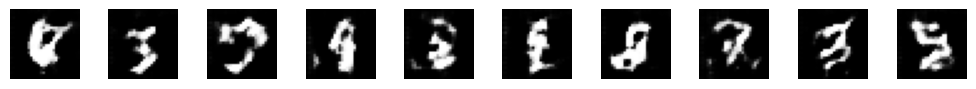

Epoch 1/5, Batch 165, Discriminator Loss: 0.39018771052360535, Generator Loss: 1.5188953876495361
Epoch 1/5, Batch 166, Discriminator Loss: 0.9739106893539429, Generator Loss: 0.6998267769813538
Epoch 1/5, Batch 167, Discriminator Loss: 0.39445212483406067, Generator Loss: 1.620725393295288
Epoch 1/5, Batch 168, Discriminator Loss: 0.3976881206035614, Generator Loss: 1.446948528289795
Epoch 1/5, Batch 169, Discriminator Loss: 0.3955438733100891, Generator Loss: 1.6148301362991333


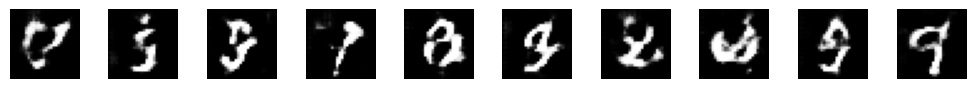

Epoch 1/5, Batch 170, Discriminator Loss: 0.4136420786380768, Generator Loss: 1.2666622400283813
Epoch 1/5, Batch 171, Discriminator Loss: 0.3937666416168213, Generator Loss: 2.090022325515747
Epoch 1/5, Batch 172, Discriminator Loss: 0.3983880579471588, Generator Loss: 1.2247493267059326
Epoch 1/5, Batch 173, Discriminator Loss: 0.7551793456077576, Generator Loss: 14.868108749389648
Epoch 1/5, Batch 174, Discriminator Loss: 1.4451686143875122, Generator Loss: 1.1639184951782227


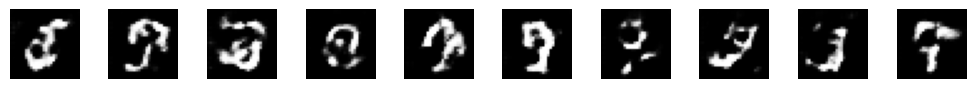

Epoch 1/5, Batch 175, Discriminator Loss: 0.3750454783439636, Generator Loss: 1.5521339178085327
Epoch 1/5, Batch 176, Discriminator Loss: 0.405140221118927, Generator Loss: 1.5782500505447388
Epoch 1/5, Batch 177, Discriminator Loss: 0.37682271003723145, Generator Loss: 2.1800711154937744
Epoch 1/5, Batch 178, Discriminator Loss: 0.3907134532928467, Generator Loss: 1.6961722373962402
Epoch 1/5, Batch 179, Discriminator Loss: 0.3847300410270691, Generator Loss: 1.8011600971221924


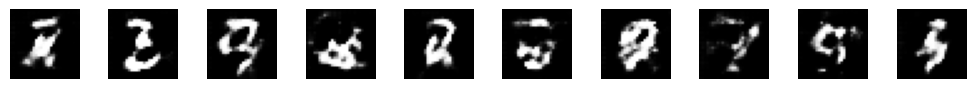

Epoch 1/5, Batch 180, Discriminator Loss: 0.3727978765964508, Generator Loss: 2.0342824459075928
Epoch 1/5, Batch 181, Discriminator Loss: 0.34661051630973816, Generator Loss: 1.3222136497497559
Epoch 1/5, Batch 182, Discriminator Loss: 0.5021613240242004, Generator Loss: 12.539883613586426
Epoch 1/5, Batch 183, Discriminator Loss: 2.8149936199188232, Generator Loss: 2.582453489303589
Epoch 1/5, Batch 184, Discriminator Loss: 0.5150018930435181, Generator Loss: 1.733628749847412


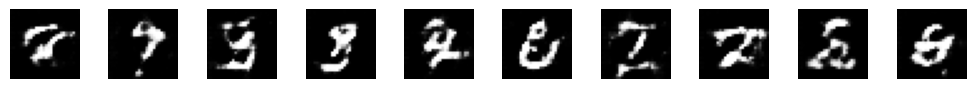

Epoch 1/5, Batch 185, Discriminator Loss: 0.4141894280910492, Generator Loss: 1.7488869428634644
Epoch 1/5, Batch 186, Discriminator Loss: 0.4073626399040222, Generator Loss: 1.6785786151885986
Epoch 1/5, Batch 187, Discriminator Loss: 0.35472726821899414, Generator Loss: 2.276841163635254
Epoch 1/5, Batch 188, Discriminator Loss: 0.3361017107963562, Generator Loss: 2.443110466003418
Epoch 1/5, Batch 189, Discriminator Loss: 0.38246333599090576, Generator Loss: 2.0502712726593018


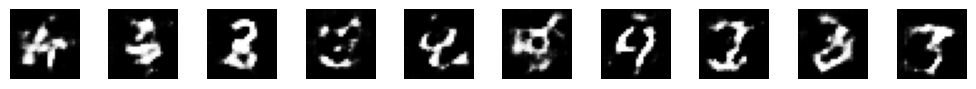

Epoch 1/5, Batch 190, Discriminator Loss: 0.3636736273765564, Generator Loss: 2.0694937705993652
Epoch 1/5, Batch 191, Discriminator Loss: 0.32140690088272095, Generator Loss: 3.352973699569702
Epoch 1/5, Batch 192, Discriminator Loss: 0.33961600065231323, Generator Loss: 2.873546600341797
Epoch 1/5, Batch 193, Discriminator Loss: 0.35784849524497986, Generator Loss: 2.636648654937744
Epoch 1/5, Batch 194, Discriminator Loss: 0.3239319324493408, Generator Loss: 4.123878479003906


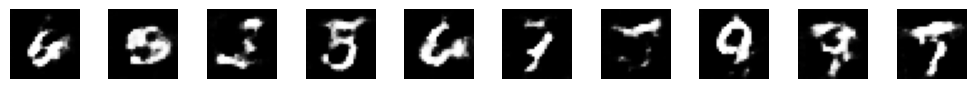

Epoch 1/5, Batch 195, Discriminator Loss: 0.32181429862976074, Generator Loss: 8.822693824768066
Epoch 1/5, Batch 196, Discriminator Loss: 2.191208600997925, Generator Loss: 1.0015373229980469
Epoch 1/5, Batch 197, Discriminator Loss: 0.3485645055770874, Generator Loss: 2.3366353511810303
Epoch 1/5, Batch 198, Discriminator Loss: 0.38517141342163086, Generator Loss: 2.641974925994873
Epoch 1/5, Batch 199, Discriminator Loss: 0.3610440194606781, Generator Loss: 2.4941978454589844


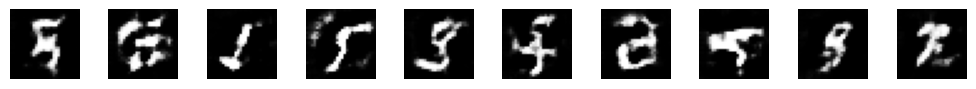

Epoch 1/5, Batch 200, Discriminator Loss: 0.3115081489086151, Generator Loss: 3.113708019256592
Epoch 1/5, Batch 201, Discriminator Loss: 0.29695725440979004, Generator Loss: 2.8321051597595215
Epoch 1/5, Batch 202, Discriminator Loss: 0.29312756657600403, Generator Loss: 4.091749668121338
Epoch 1/5, Batch 203, Discriminator Loss: 0.3009638786315918, Generator Loss: 2.032984495162964
Epoch 1/5, Batch 204, Discriminator Loss: 0.3622491955757141, Generator Loss: 14.164285659790039


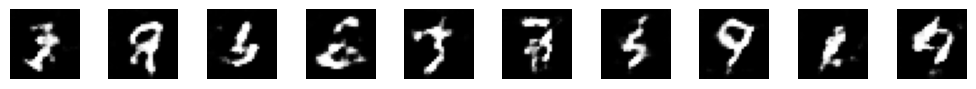

Epoch 1/5, Batch 205, Discriminator Loss: 0.8853132724761963, Generator Loss: 1.3770811557769775
Epoch 1/5, Batch 206, Discriminator Loss: 0.675266444683075, Generator Loss: 1.1595513820648193
Epoch 1/5, Batch 207, Discriminator Loss: 0.6050471663475037, Generator Loss: 1.7511138916015625
Epoch 1/5, Batch 208, Discriminator Loss: 0.4460214376449585, Generator Loss: 1.9593720436096191
Epoch 1/5, Batch 209, Discriminator Loss: 0.4040217399597168, Generator Loss: 2.4749975204467773


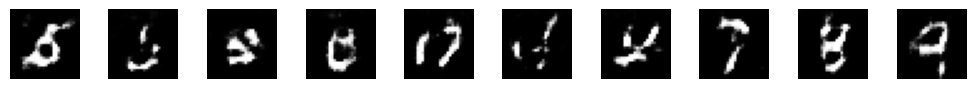

Epoch 1/5, Batch 210, Discriminator Loss: 0.3737114369869232, Generator Loss: 3.0587592124938965
Epoch 1/5, Batch 211, Discriminator Loss: 0.5016320943832397, Generator Loss: 2.4373912811279297
Epoch 1/5, Batch 212, Discriminator Loss: 0.46699297428131104, Generator Loss: 1.9999775886535645
Epoch 1/5, Batch 213, Discriminator Loss: 0.48045244812965393, Generator Loss: 1.9698187112808228
Epoch 1/5, Batch 214, Discriminator Loss: 0.4136200249195099, Generator Loss: 1.7924602031707764


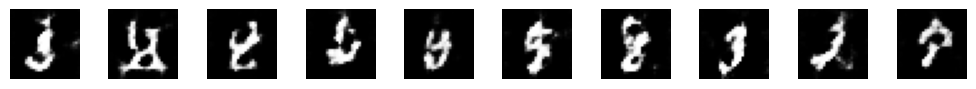

Epoch 1/5, Batch 215, Discriminator Loss: 0.4245123863220215, Generator Loss: 1.9339133501052856
Epoch 1/5, Batch 216, Discriminator Loss: 0.3744354844093323, Generator Loss: 2.1702492237091064
Epoch 1/5, Batch 217, Discriminator Loss: 0.3868480920791626, Generator Loss: 2.9930217266082764
Epoch 1/5, Batch 218, Discriminator Loss: 0.3471931219100952, Generator Loss: 2.3273985385894775
Epoch 1/5, Batch 219, Discriminator Loss: 0.2907765507698059, Generator Loss: 3.351325750350952


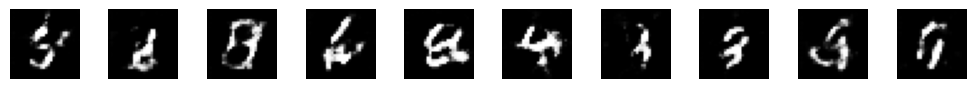

Epoch 1/5, Batch 220, Discriminator Loss: 0.28621482849121094, Generator Loss: 3.0684664249420166
Epoch 1/5, Batch 221, Discriminator Loss: 0.3254176676273346, Generator Loss: 5.0780348777771
Epoch 1/5, Batch 222, Discriminator Loss: 0.30555739998817444, Generator Loss: 2.0846543312072754
Epoch 1/5, Batch 223, Discriminator Loss: 0.3373044431209564, Generator Loss: 7.620685577392578
Epoch 1/5, Batch 224, Discriminator Loss: 3.3939504623413086, Generator Loss: 4.703879356384277


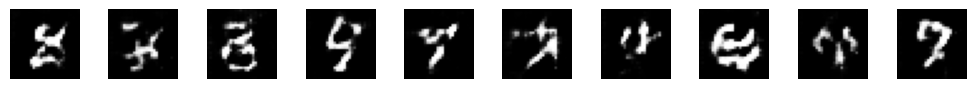

Epoch 1/5, Batch 225, Discriminator Loss: 0.3897588551044464, Generator Loss: 4.865926742553711
Epoch 1/5, Batch 226, Discriminator Loss: 0.4505395293235779, Generator Loss: 3.580632209777832
Epoch 1/5, Batch 227, Discriminator Loss: 0.3451133072376251, Generator Loss: 2.811262845993042
Epoch 1/5, Batch 228, Discriminator Loss: 0.34551000595092773, Generator Loss: 4.065168380737305
Epoch 1/5, Batch 229, Discriminator Loss: 0.331821084022522, Generator Loss: 3.2438783645629883


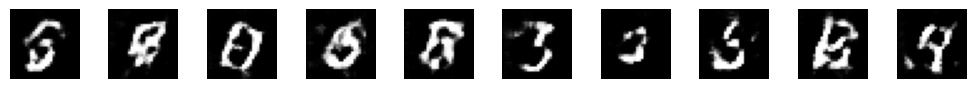

Epoch 1/5, Batch 230, Discriminator Loss: 0.31145650148391724, Generator Loss: 4.254004001617432
Epoch 1/5, Batch 231, Discriminator Loss: 0.3262656331062317, Generator Loss: 3.5787715911865234
Epoch 1/5, Batch 232, Discriminator Loss: 0.333936482667923, Generator Loss: 2.048489570617676
Epoch 1/5, Batch 233, Discriminator Loss: 0.3727993369102478, Generator Loss: 9.892208099365234


InvalidArgumentError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} required broadcastable shapes [Op:Mul]

In [117]:
n_epochs = 5
coding_size = 100
d_iterations = 3

history = {'d_loss': [], 'g_loss': []}

def plot_generated_images(generator, epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = tf.random.normal([examples, coding_size])
    generated_images = generator(noise, training=False)
    generated_images = 0.5 * generated_images + 0.5  
    
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


for epoch in range(n_epochs):
    n_batches = 0
    for xbatch in dataset:
        for _ in range(d_iterations):
            with tf.GradientTape() as d_tape:
                noise = tf.random.normal([batch_size, coding_size])
                generated_images = generator(noise)
                realimgs = xbatch 
                realandfake = tf.concat([realimgs, generated_images], axis=0)
                labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)
                d_predictions = discriminator(realandfake)
                d_loss = tf.keras.losses.binary_crossentropy(labels, d_predictions)

            d_gradients = d_tape.gradient(d_loss, discriminator.trainable_weights)
            d_optimizer.apply_gradients(zip(d_gradients, discriminator.trainable_weights))
        
        with tf.GradientTape() as g_tape:
            noise = tf.random.normal([batch_size, coding_size])
            generated_images = generator(noise)
            g_predictions = discriminator(generated_images)
            g_loss = tf.keras.losses.binary_crossentropy(tf.ones((batch_size, 1)), g_predictions)
        
        g_gradients = g_tape.gradient(g_loss, generator.trainable_weights)
        g_optimizer.apply_gradients(zip(g_gradients, generator.trainable_weights))
        
        # Convert the losses to numpy for better readability
        d_loss_np = tf.reduce_mean(d_loss).numpy()
        g_loss_np = tf.reduce_mean(g_loss).numpy()
        
        history['d_loss'].append(d_loss_np)
        history['g_loss'].append(g_loss_np)
        
        print(f'Epoch {epoch + 1}/{n_epochs}, Batch {n_batches}, Discriminator Loss: {d_loss_np}, Generator Loss: {g_loss_np}')
        
        n_batches += 1

        if n_batches % 5 == 0:
            plot_generated_images(generator, epoch)
    
    print(f'End of epoch {epoch + 1}, Discriminator Loss: {d_loss_np}, Generator Loss: {g_loss_np}')



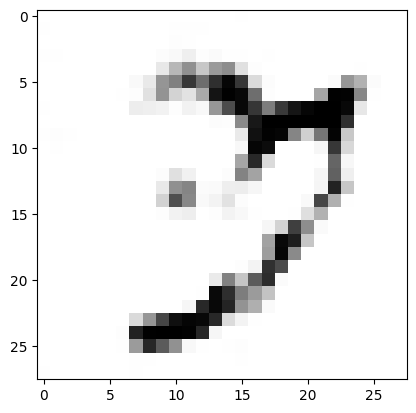

In [118]:
teste = generator(tf.random.normal([1, 100]))
teste = teste.numpy().reshape(28, 28)
plt.imshow(teste, cmap = 'binary')

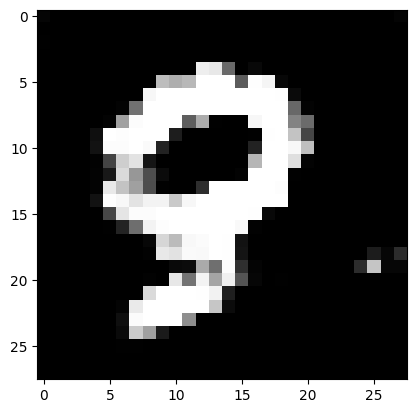

In [72]:
plt.imshow(generator(tf.random.normal((1, 100))).numpy().reshape(28, 28), cmap = 'gray')